# Nicholas Hodge<br> OLA 5

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sp
sp.init_printing(use_latex=True)
from IPython.display import display
from sklearn.decomposition import PCA
import tensorflow.keras as keras
from sklearn.manifold import TSNE

### Problem 1

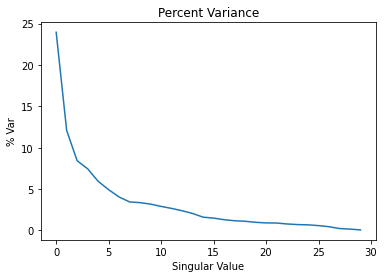

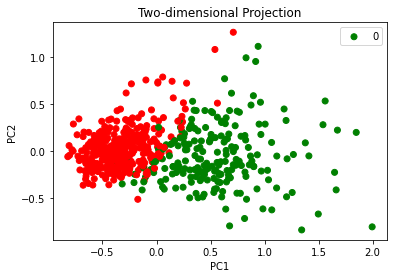

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


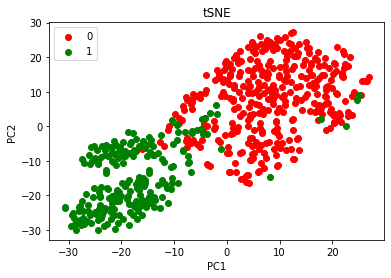

In [10]:
data = np.array(
    pandas.read_table("https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/WDBC.txt",
    delim_whitespace=True,
    header=None))

X = data[:, 0:30]
Y = data[: ,30].astype(int)

def mean_center(x):
    return x - np.mean(x)

#mean centering    
Xcentered = np.apply_along_axis(mean_center, 0, X)

#SVD
U, S, V = np.linalg.svd(Xcentered, full_matrices=True)

#Percent Variance accounted for
plt.plot(100.0*S/np.sum(S))
plt.ylabel('% Var')
plt.xlabel('Singular Value')
plt.title("Percent Variance")
plt.show()

D = np.zeros([X.shape[0], X.shape[1]])
np.fill_diagonal(D,S)
Xrotated = np.dot(U,D)
PCs = Xrotated[:,0:2]

colors = ['red', 'green']

pca = PCA(2)
PCs = pca.fit_transform(X)[:,0:2]

plt.scatter(PCs[:,0], 
            PCs[:,1],
            color=[['red','green'][i] for i in Y])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend([str(x) for x in range(len(colors))])
plt.title("Two-dimensional Projection")
plt.show()

NPCs = TSNE(n_components=2).fit_transform(X)
for i in range(len(colors)):
    plt.scatter(NPCs[Y.astype(int)==i, 0],
                NPCs[Y.astype(int)==i, 1],
                color=colors[i])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend([str(x) for x in range(len(colors))])
plt.title("tSNE")
plt.show()

The two-dimensional projection shows a clear categorical distinction of the data, with the green data points having a much higher outlier than the red.
The tSNE graph shows much closer green data points, with the red still in a relatively tight group, making it slightly clearer.

### Problem 2

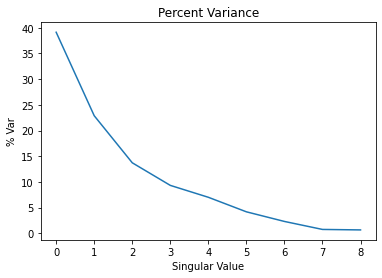

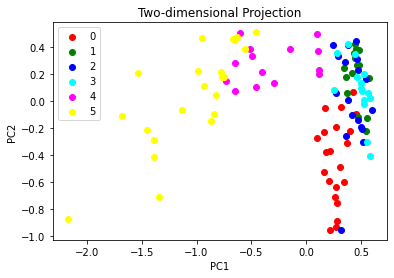

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


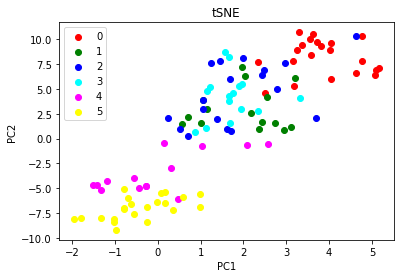

In [7]:
data = np.array(
    pandas.read_table("https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/cancer-data.txt",
    delim_whitespace=True,
    header=None))

X = data[:,0:9]
Y = data[:,9].astype(int)

def mean_center(x):
    return x - np.mean(x)


#mean centering    
Xcentered = np.apply_along_axis(mean_center, 0, X)

#SVD
U, S, V = np.linalg.svd(Xcentered, full_matrices=True)

#Percent Variance accounted for
plt.plot(100.0*S/np.sum(S))
plt.ylabel('% Var')
plt.xlabel('Singular Value')
plt.title("Percent Variance")
plt.show()

D = np.zeros([X.shape[0], X.shape[1]])
np.fill_diagonal(D,S)
Xrotated = np.dot(U,D)
PCs = Xrotated[:,0:2]

colors = ['red', 'green', 'blue', 
          'cyan', 'magenta', 'yellow']

for i in range(len(colors)):
    plt.scatter(PCs[Y==i,0],
                PCs[Y==i,1],
                color=colors[i])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend([str(x) for x in range(len(colors))])
plt.title("Two-dimensional Projection")
plt.show()

pca = PCA(2)
PCs = pca.fit_transform(X)[:,0:2]

NPCs = TSNE(n_components=2).fit_transform(X)
for i in range(len(colors)):
    plt.scatter(NPCs[Y.astype(int)==i, 0],
                NPCs[Y.astype(int)==i, 1],
                color=colors[i])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend([str(x) for x in range(len(colors))])
plt.title("tSNE")
plt.show()

The two-dimensional projection does not show clear categorical disctinction as many of the data points are far spread and overlapping.
The tSNE graph shows a much better categorical distinction, with the data points sharing a oval grouping.